In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data

In [2]:
df = pd.read_csv('fp_pred.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
df.head()

,player_name,game_id,game_date,reb,reb_pred,fanduel_salary,draftkings_salary,yahoo_salary,fanduel_position,draftkings_position,...,blk,blk_pred,tov,tov_pred,fp_fanduel,fp_fanduel_pred,fp_yahoo,fp_yahoo_pred,fp_draftkings,fp_draftkings_pred
0,Draymond Green,21600054,2016-11-01,8,9.793323,7700.0,7700.0,39.0,PF/C,PF/C,...,2,1.656776,0,1.713897,44.1,46.528559,44.1,46.528559,39.5,41.909204
1,Kristaps Porzingis,21600050,2016-11-01,6,5.766671,7100.0,7100.0,33.0,PF,PF,...,1,1.369101,0,0.036556,29.7,23.295500,29.7,23.295500,29.0,22.211929
2,Ian Clark,21600054,2016-11-01,2,1.368933,3000.0,3000.0,10.0,PG/SG,PG/SG,...,0,0.012671,1,1.015507,33.9,18.457870,33.9,18.457870,31.5,17.526521
3,Buddy Hield,21600051,2016-11-01,0,1.537388,3500.0,3500.0,10.0,SG,SG,...,0,0.012671,4,2.423512,9.0,12.038627,9.0,12.038627,10.0,12.324354
4,Tyler Ennis,21600047,2016-11-01,2,1.567039,NaN,NaN,10.0,NaN,NaN,...,0,0.012671,0,0.999679,3.9,4.615180,3.9,4.615180,4.0,5.159618


In [4]:
df.columns

Index(['player_name', 'game_id', 'game_date', 'reb', 'reb_pred',
       'fanduel_salary', 'draftkings_salary', 'yahoo_salary',
       'fanduel_position', 'draftkings_position', 'yahoo_position', 'pts',
       'pts_pred', 'ast', 'ast_pred', 'stl', 'stl_pred', 'blk', 'blk_pred',
       'tov', 'tov_pred', 'fp_fanduel', 'fp_fanduel_pred', 'fp_yahoo',
       'fp_yahoo_pred', 'fp_draftkings', 'fp_draftkings_pred'],
      dtype='object')

# Summary statistics

In [6]:
df.describe()

,game_id,reb,reb_pred,fanduel_salary,draftkings_salary,yahoo_salary,pts,pts_pred,ast,ast_pred,...,blk,blk_pred,tov,tov_pred,fp_fanduel,fp_fanduel_pred,fp_yahoo,fp_yahoo_pred,fp_draftkings,fp_draftkings_pred
count,1.903960e+05,190396.000000,190396.000000,185950.000000,185950.000000,189045.000000,190396.000000,190396.000000,190396.000000,190396.000000,...,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000,190396.000000
mean,2.195272e+07,4.146694,4.023065,4850.187147,4850.187147,16.984054,10.470089,10.182225,2.332328,2.217802,...,0.457567,0.438354,1.261618,1.192144,21.200145,20.510179,21.200145,20.510179,21.004832,20.258531
std,2.331332e+05,3.467689,2.889185,1954.730103,1954.730103,10.307817,8.579682,7.284560,2.571810,2.176817,...,0.823919,0.721108,1.393874,1.170831,14.502280,12.407492,14.502280,12.407492,14.456081,12.289127
min,2.160005e+07,0.000000,-0.644500,3000.000000,3000.000000,10.000000,0.000000,-1.025730,0.000000,-0.361109,...,0.000000,-0.140023,0.000000,-0.288326,-3.500000,-2.028084,-3.500000,-2.028084,-1.500000,-0.499296
25%,2.170117e+07,2.000000,1.891141,3200.000000,3200.000000,10.000000,4.000000,4.639216,0.000000,0.492202,...,0.000000,0.012984,0.000000,0.045836,10.000000,11.214455,10.000000,11.214455,10.000000,11.126186
50%,2.200010e+07,3.000000,3.529872,4200.000000,4200.000000,11.000000,9.000000,9.042862,2.000000,1.689972,...,0.000000,0.013717,1.000000,1.010179,19.200000,18.980346,19.200000,18.980346,19.000000,18.655789
75%,2.220015e+07,6.000000,5.453780,5900.000000,5900.000000,21.000000,15.000000,14.094372,3.000000,3.156449,...,1.000000,0.983973,2.000000,1.925172,30.200000,28.021338,30.200000,28.021338,29.750000,27.450593
max,2.230123e+07,31.000000,21.262001,14000.000000,14000.000000,66.000000,73.000000,50.003210,25.000000,17.055742,...,10.000000,6.279593,12.000000,9.382727,105.200000,83.764683,105.200000,83.764683,109.750000,86.144494


<Figure size 2000x1200 with 0 Axes>

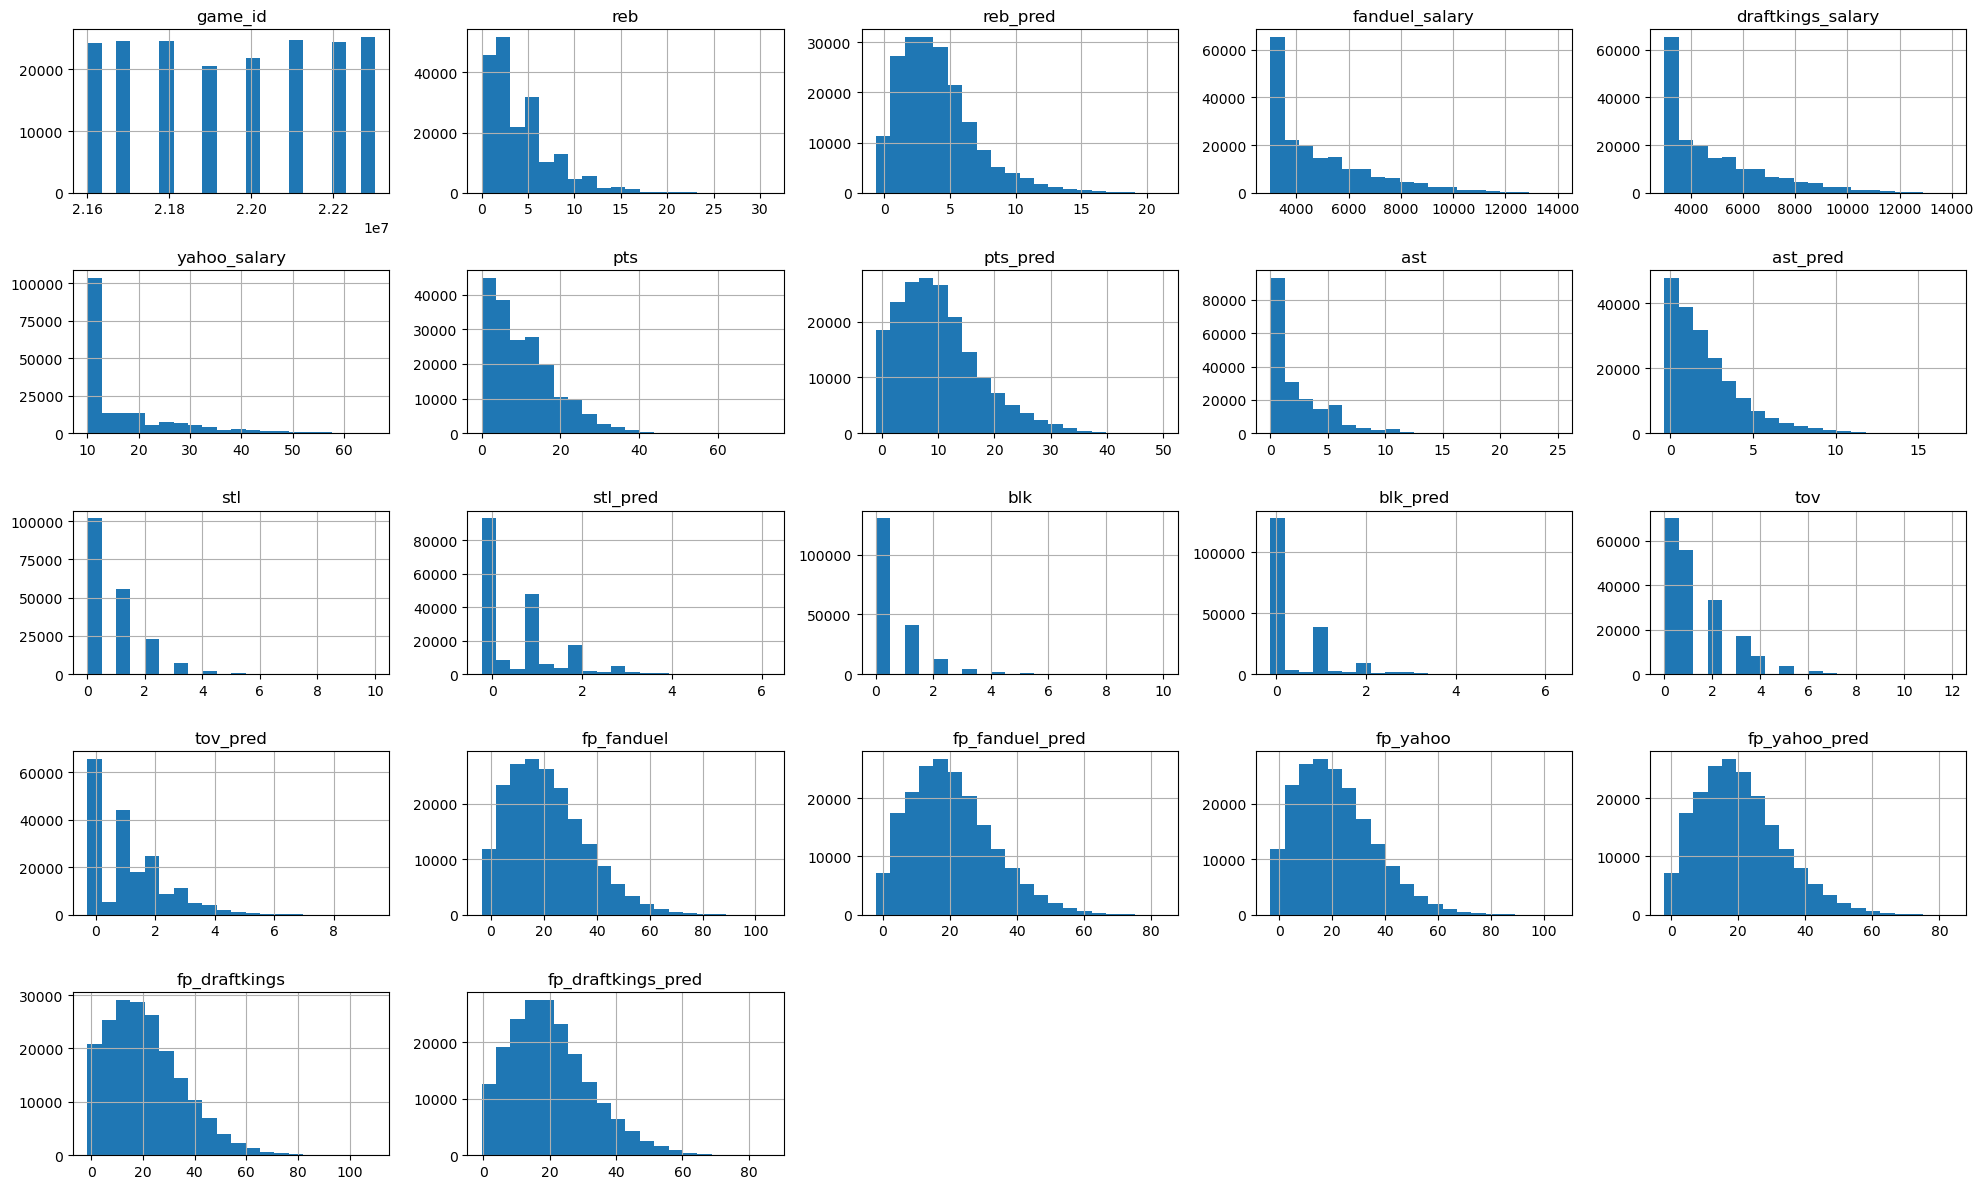

In [12]:
plt.figure(figsize=(20, 12))
df.hist(bins=20, figsize=(20, 12), layout=(5, 5))
plt.tight_layout()
plt.show()

In [10]:
stat_cols = ['reb', 'reb_pred',
       'pts', 'pts_pred', 'ast', 'ast_pred', 'stl',
       'stl_pred', 'blk', 'blk_pred', 'tov', 'tov_pred', 'fp_fanduel',
       'fp_fanduel_pred', 'fp_yahoo', 'fp_yahoo_pred', 'fp_draftkings',
       'fp_draftkings_pred']

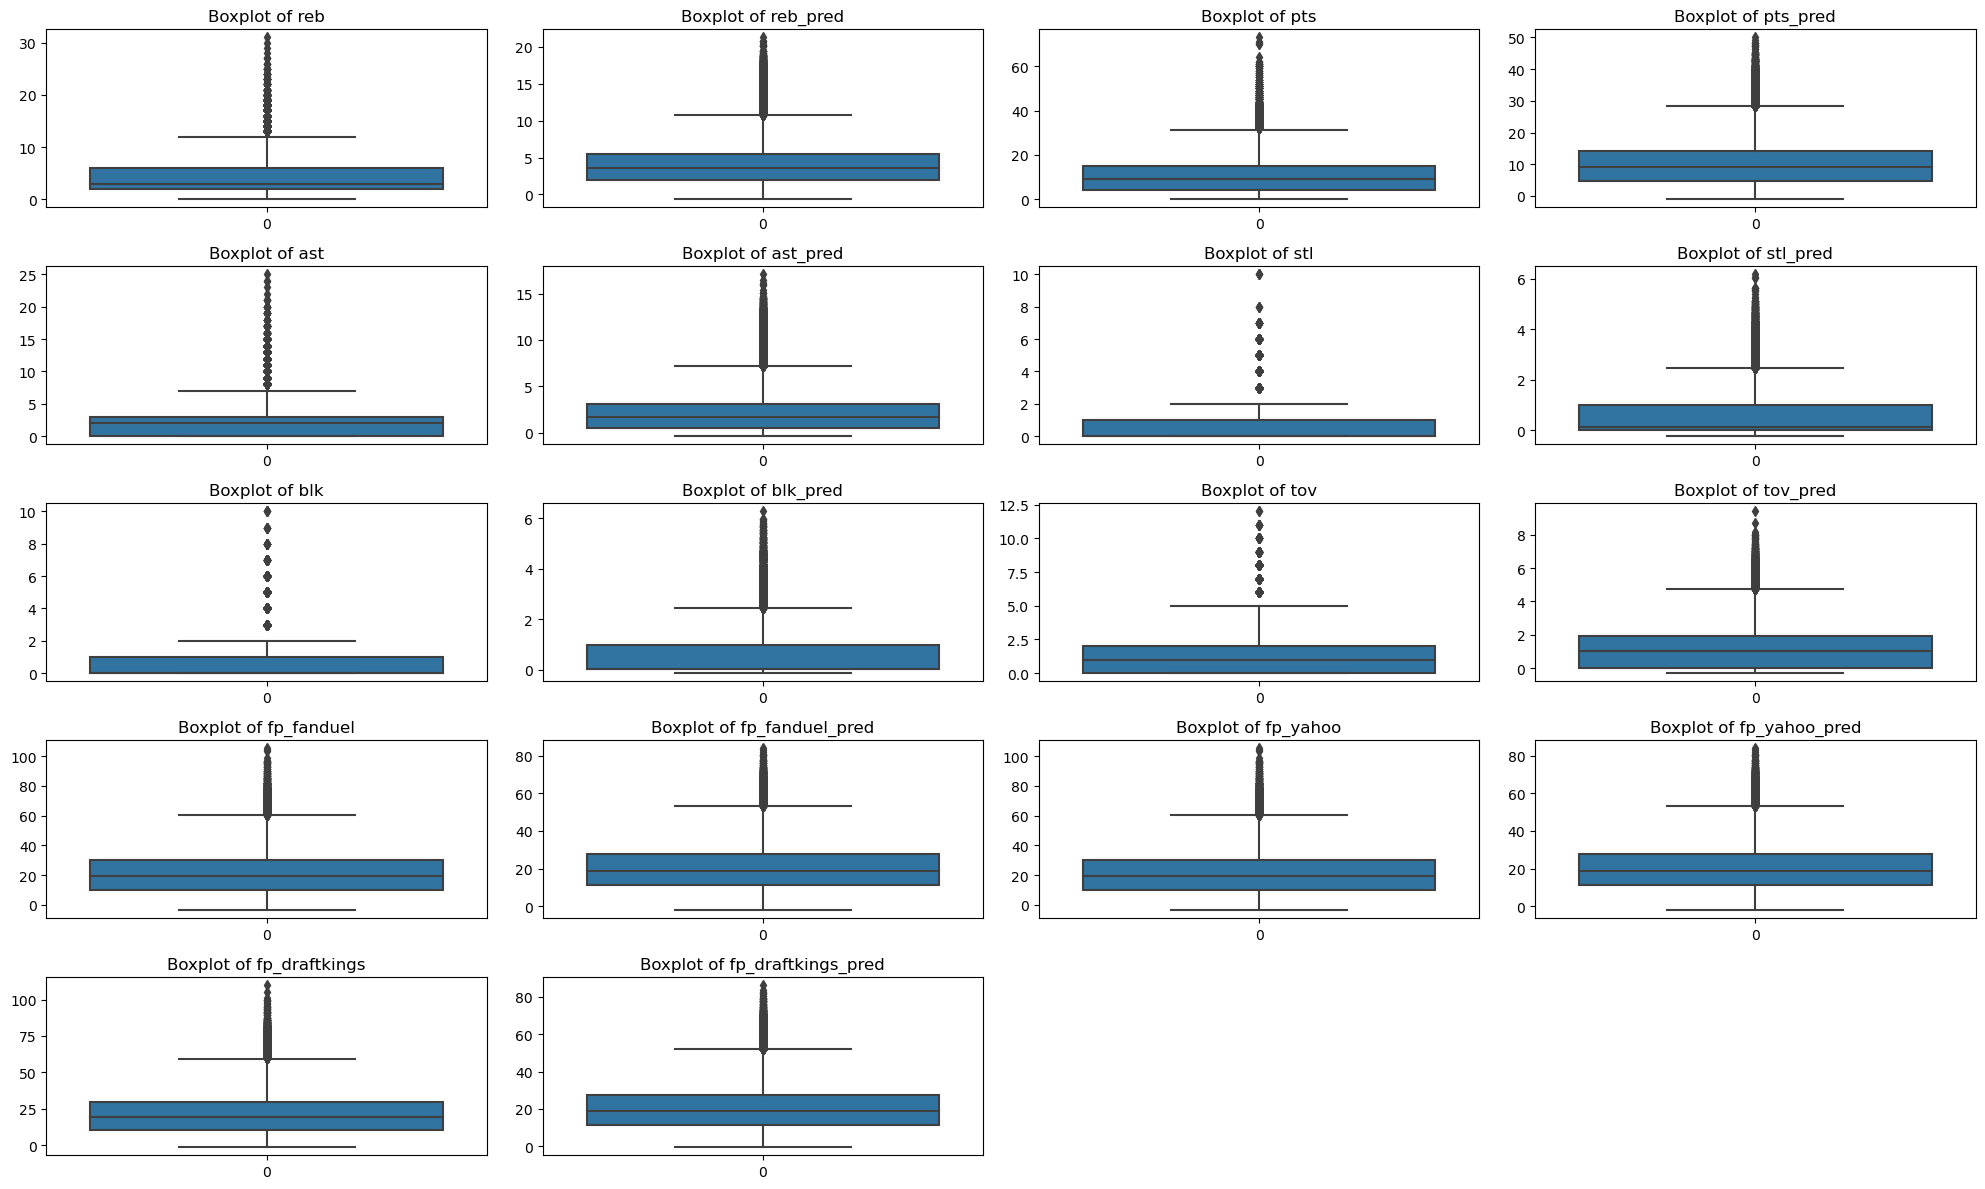

In [11]:
plt.figure(figsize=(20, 12))
for i, column in enumerate(stat_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


# Calcluate errors

In [14]:
# Calculate prediction errors
df['pts_error'] = abs(df['pts'] - df['pts_pred'])
df['reb_error'] = abs(df['reb'] - df['reb_pred'])
df['ast_error'] = abs(df['ast'] - df['ast_pred'])
df['stl_error'] = abs(df['stl'] - df['stl_pred'])
df['blk_error'] = abs(df['blk'] - df['blk_pred'])
df['tov_error'] = abs(df['tov'] - df['tov_pred'])
df['fp_fanduel_error'] = abs(df['fp_fanduel'] - df['fp_fanduel_pred'])
df['fp_yahoo_error'] = abs(df['fp_yahoo'] - df['fp_yahoo_pred'])
df['fp_draftkings_error'] = abs(df['fp_draftkings'] - df['fp_draftkings_pred'])

# Calculate percentage errors (avoid division by zero)
df['pts_pct_error'] = abs((df['pts'] - df['pts_pred']) / df['pts'].replace(0, 1))
df['reb_pct_error'] = abs((df['reb'] - df['reb_pred']) / df['reb'].replace(0, 1))
df['ast_pct_error'] = abs((df['ast'] - df['ast_pred']) / df['ast'].replace(0, 1))
df['stl_pct_error'] = abs((df['stl'] - df['stl_pred']) / df['stl'].replace(0, 1))
df['blk_pct_error'] = abs((df['blk'] - df['blk_pred']) / df['blk'].replace(0, 1))
df['tov_pct_error'] = abs((df['tov'] - df['tov_pred']) / df['tov'].replace(0, 1))
df['fp_fanduel_pct_error'] = abs((df['fp_fanduel'] - df['fp_fanduel_pred']) / df['fp_fanduel'].replace(0, 1))
df['fp_yahoo_pct_error'] = abs((df['fp_yahoo'] - df['fp_yahoo_pred']) / df['fp_yahoo'].replace(0, 1))
df['fp_draftkings_pct_error'] = abs((df['fp_draftkings'] - df['fp_draftkings_pred']) / df['fp_draftkings'].replace(0, 1))


# Top Players

In [39]:
from sklearn.metrics import mean_squared_error


df['game_date'] = pd.to_datetime(df['game_date'])

ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [59]:
def calculate_mse_per_day(df, platform):
    mse_per_day = df.groupby('game_date').apply(
        lambda x: mean_squared_error(x[f'fp_{platform}'], x[f'fp_{platform}_pred'], squared=False)
    ).reset_index(name='RMSE')
    return mse_per_day


def create_kpi(df, platform, n=10):
    df[f'{platform}_positions'] = df[f'{platform}_position'].str.split('/')
    df_exploded = df.explode(f'{platform}_positions')
    df_exploded.sort_values(by=['game_date', f'{platform}_positions', f'{platform}_salary'], ascending=[True, True, False], inplace=True)

    df_top_players = df_exploded.groupby(['game_date', f'{platform}_positions']).apply(
        lambda x: x.head(n)
    ).reset_index(drop=True)
    
    mse_per_day = calculate_mse_per_day(df_top_players, platform)
    
    players_positions_per_date = df_top_players.groupby('game_date').apply(
    lambda x: list(zip(x['player_name'], x[f'{platform}_positions']))).reset_index(name='players_positions')

    mse_per_day_with_players_positions = mse_per_day.merge(players_positions_per_date, on='game_date', how='left')
    mse_per_day_with_players_positions['n_players'] = mse_per_day_with_players_positions['players_positions'].apply(lambda x: len(set(i[0] for i in x)))
    return mse_per_day_with_players_positions.set_index('game_date')

In [64]:
res  = {'fanduel': {'daily': create_kpi(df, 'fanduel')},
'yahoo': {'daily': create_kpi(df, 'yahoo')},
'draftkings': {'daily': create_kpi(df, 'draftkings')}}

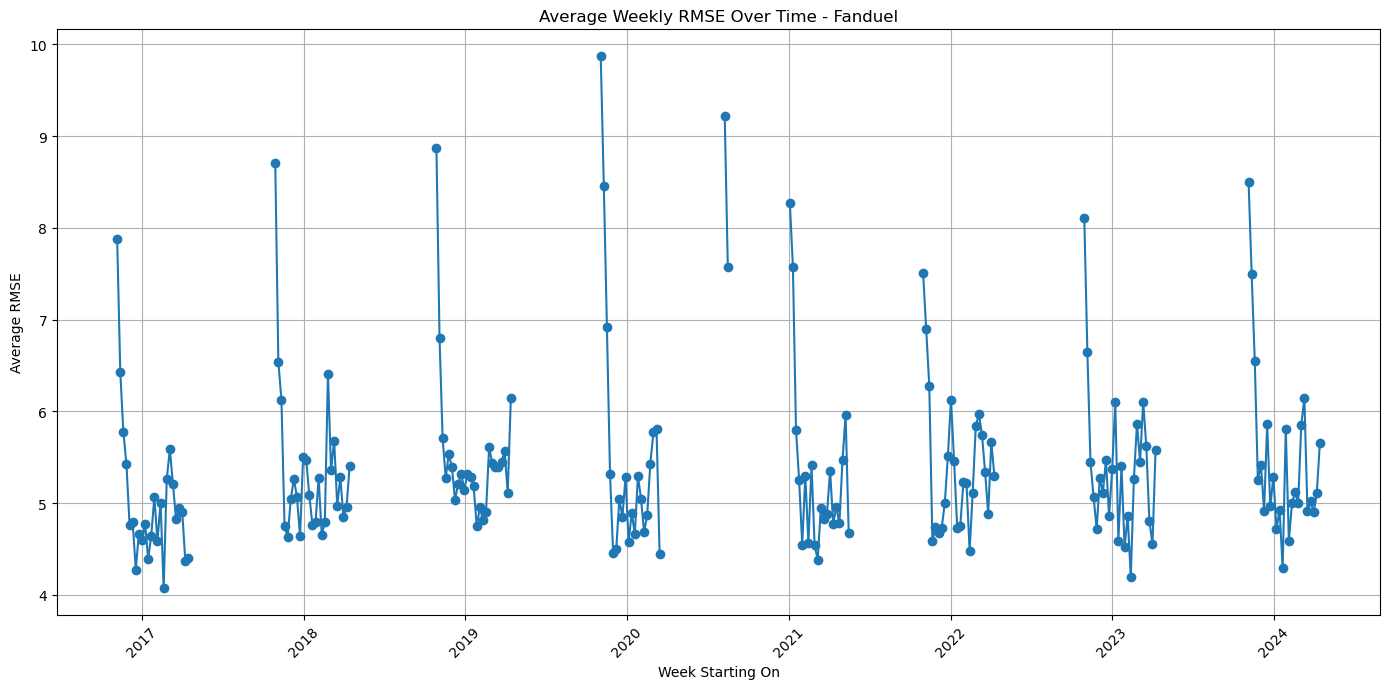

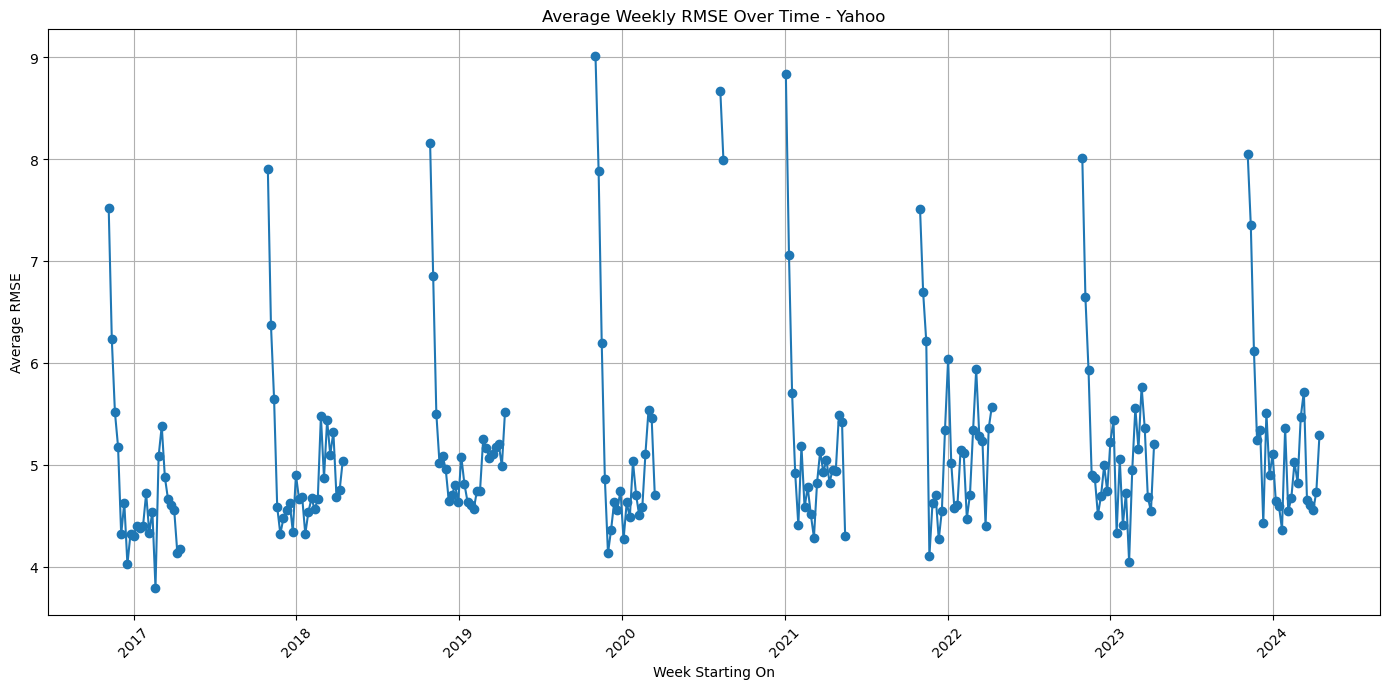

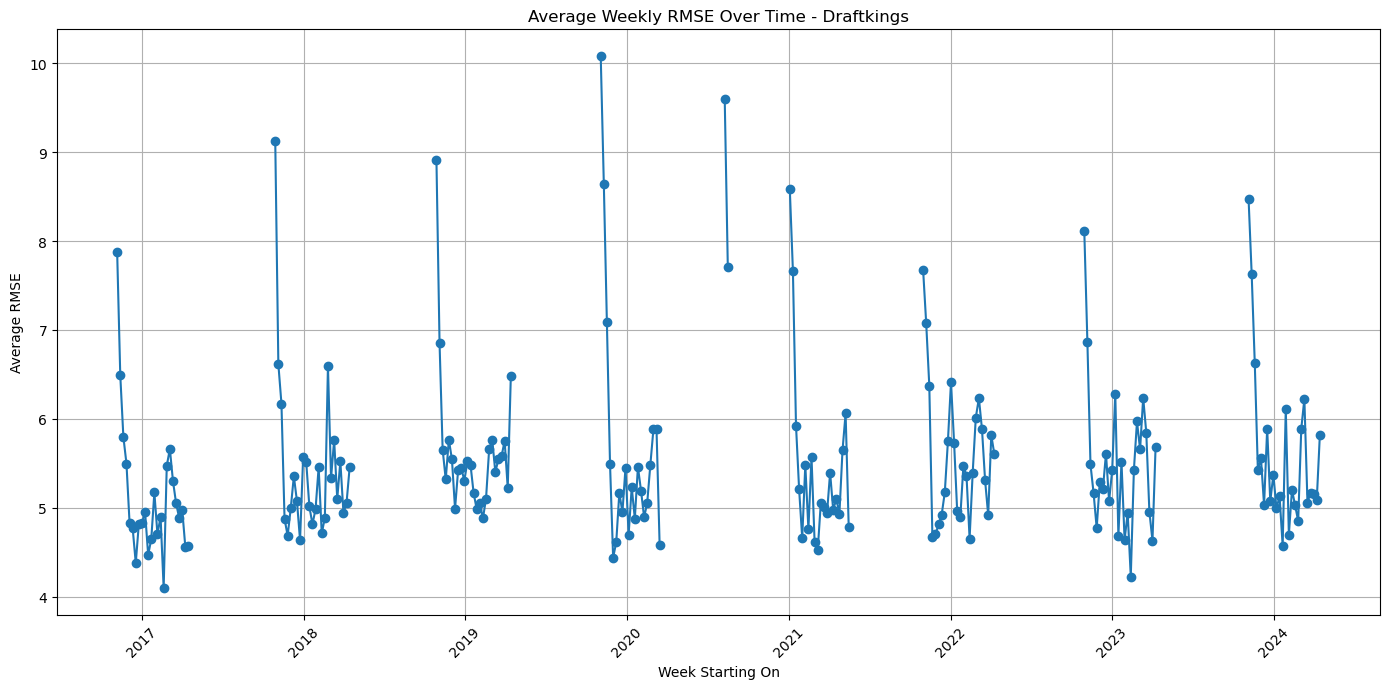

In [65]:
for plat in res.keys():
    weekly_rmse = res[plat]['daily']['RMSE'].resample('W').mean().reset_index()
    weekly_rmse.columns = ['week_starting_on', 'average_RMSE']
    
    res[plat].update({'weekly': weekly_rmse})
    plt.figure(figsize=(14, 7))
    plt.plot(weekly_rmse['week_starting_on'], weekly_rmse['average_RMSE'], marker='o')
    plt.title(f'Average Weekly RMSE Over Time - {plat.title()}')
    plt.xlabel('Week Starting On')
    plt.ylabel('Average RMSE')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    

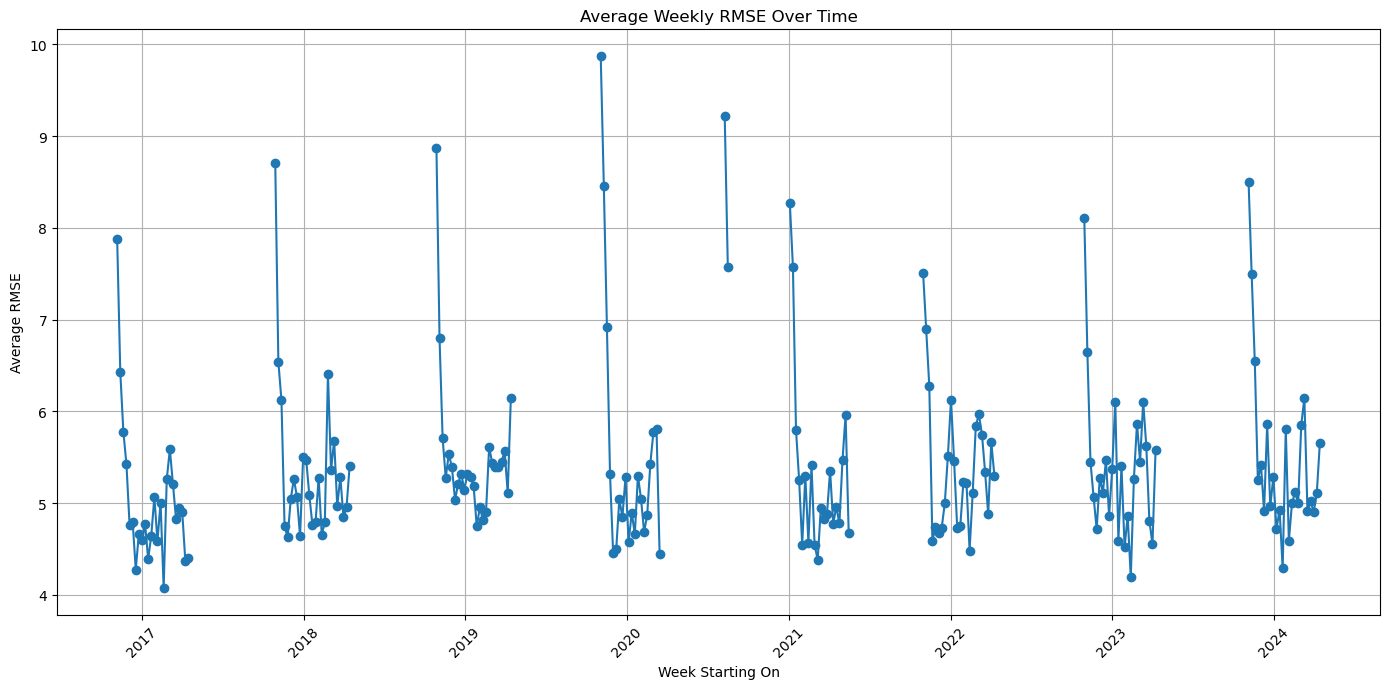

In [63]:
plt.figure(figsize=(14, 7))
plt.plot(weekly_rmse['week_starting_on'], weekly_rmse['average_RMSE'], marker='o')
plt.title('Average Weekly RMSE Over Time')
plt.xlabel('Week Starting On')
plt.ylabel('Average RMSE')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Group by team

In [14]:
team_errors = df.groupby('team').mean()[[
    'pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error',
    'fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error',
    'pts_pct_error', 'reb_pct_error', 'ast_pct_error', 'stl_pct_error', 'blk_pct_error', 'to_pct_error',
    'fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error'
]]

C:\Users\User\AppData\Local\Temp\ipykernel_8552\827017784.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  team_errors = df.groupby('team').mean()[[


In [16]:
team_errors_sorted = team_errors.sort_values(by='fp_fanduel_error')
team_errors_sorted

,pts_error,reb_error,ast_error,stl_error,blk_error,to_error,fp_fanduel_error,fp_yahoo_error,fp_draftkings_error,pts_pct_error,reb_pct_error,ast_pct_error,stl_pct_error,blk_pct_error,to_pct_error,fp_fanduel_pct_error,fp_yahoo_pct_error,fp_draftkings_pct_error
team,,,,,,,,,,,,,,,,,,
NYK,3.179753,1.430321,0.793845,0.527019,0.378781,0.559938,5.633101,5.633101,5.321602,0.885613,0.647536,0.455444,0.430047,0.316780,0.405383,1.109841,1.109841,1.070750
UTA,3.452269,1.447175,0.967490,0.438781,0.342864,0.658116,5.694891,5.694891,5.520441,0.959400,0.641652,0.538343,0.371653,0.282598,0.480153,1.437762,1.437762,1.346735
POR,3.427873,1.517371,0.926310,0.446950,0.383303,0.613572,5.768198,5.768198,5.572791,1.067798,0.674291,0.525904,0.370459,0.337846,0.449320,1.501190,1.501190,1.378065
CHI,3.419547,1.581480,1.117403,0.517381,0.347378,0.682713,5.997727,5.997727,5.776987,1.074004,0.752422,0.611023,0.419582,0.302085,0.515652,1.689615,1.689615,1.628775
MIL,3.709488,1.592318,0.875004,0.569700,0.350343,0.638922,5.999352,5.999352,5.823855,1.158136,0.666422,0.460337,0.448637,0.287158,0.469049,1.573379,1.573379,1.521524
PHX,3.673650,1.436846,0.938606,0.485364,0.350854,0.622810,6.232662,6.232662,5.983664,0.980749,0.668189,0.521624,0.391268,0.295841,0.458944,1.371083,1.371083,1.332268
DAL,3.421201,1.608997,0.951883,0.507430,0.350799,0.552425,6.255639,6.255639,5.982913,1.081282,0.836367,0.557598,0.406976,0.312745,0.419659,1.818699,1.818699,1.655208
WAS,4.046188,1.642378,0.930350,0.501019,0.426307,0.725010,6.482293,6.482293,6.287709,1.190983,0.717840,0.496271,0.415356,0.350991,0.504605,1.444781,1.444781,1.381231
ATL,3.874785,1.678092,0.912375,0.548362,0.361904,0.668321,6.544161,6.544161,6.261242,1.145320,0.764456,0.511717,0.440703,0.307888,0.473293,1.573177,1.573177,1.528708


<Figure size 1400x800 with 0 Axes>

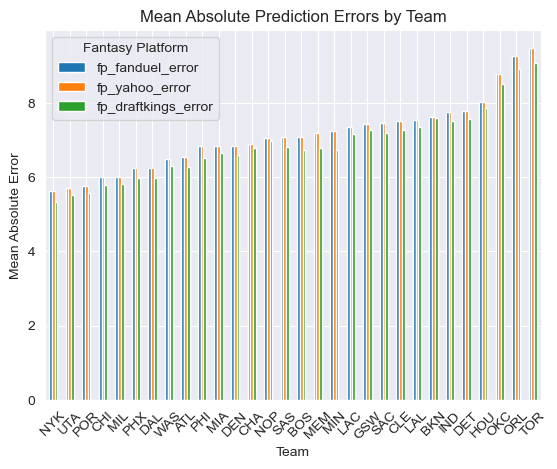

<Figure size 1400x800 with 0 Axes>

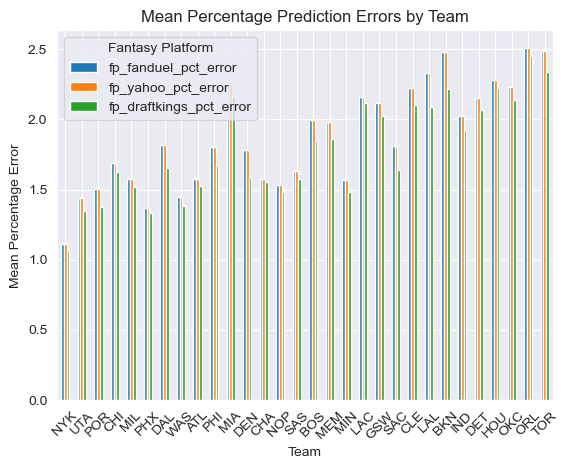

In [17]:
plt.figure(figsize=(14, 8))
team_errors_sorted[['fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error']].plot(kind='bar')
plt.title('Mean Absolute Prediction Errors by Team')
plt.xlabel('Team')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.legend(title='Fantasy Platform')
plt.show()

# Plot mean percentage errors by team
plt.figure(figsize=(14, 8))
team_errors_sorted[['fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error']].plot(kind='bar')
plt.title('Mean Percentage Prediction Errors by Team')
plt.xlabel('Team')
plt.ylabel('Mean Percentage Error')
plt.xticks(rotation=45)
plt.legend(title='Fantasy Platform')
plt.show()

## Group by position

## Group by perforamnce

In [18]:
df['pts_cluster'] = pd.cut(df['pts'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<5', '5-10', '10-20', '>20'])

# Repeat for other categories
df['reb_cluster'] = pd.cut(df['reb'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<3', '3-7', '7-12', '>12'])
df['ast_cluster'] = pd.cut(df['ast'], bins=[-float('inf'), 5, 10, 20, float('inf')],
                           labels=['<3', '3-7', '7-12', '>12'])
df['stl_cluster'] = pd.cut(df['stl'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                           labels=['<1', '1-2', '2-3', '>3'])
df['blk_cluster'] = pd.cut(df['blk'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                           labels=['<1', '1-2', '2-3', '>3'])
df['to_cluster'] = pd.cut(df['to'], bins=[-float('inf'), 1, 2, 3, float('inf')],
                          labels=['<1', '1-2', '2-3', '>3'])
df['fp_fanduel_cluster'] = pd.cut(df['fp_fanduel'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                  labels=['<10', '10-20', '20-30', '>30'])
df['fp_yahoo_cluster'] = pd.cut(df['fp_yahoo'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                labels=['<10', '10-20', '20-30', '>30'])
df['fp_draftkings_cluster'] = pd.cut(df['fp_draftkings'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                     labels=['<10', '10-20', '20-30', '>30'])


C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

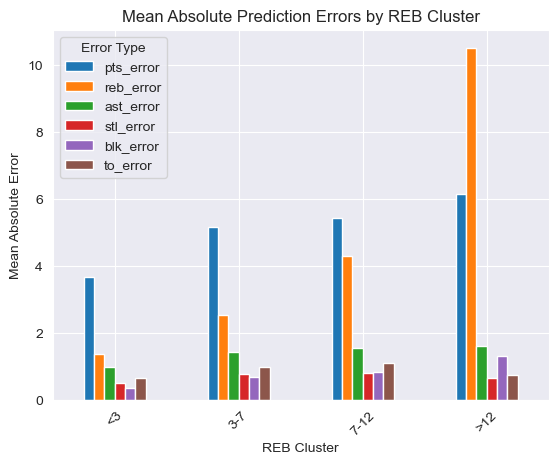

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

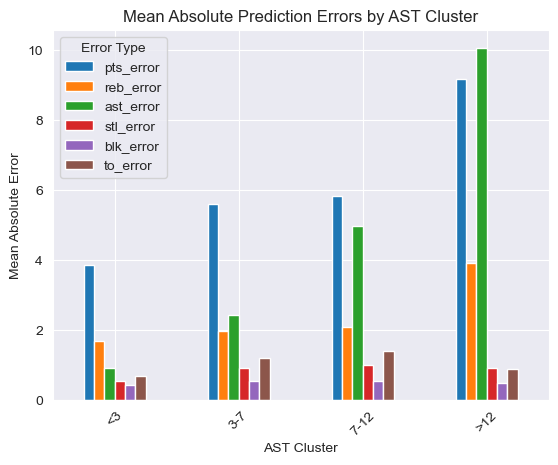

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

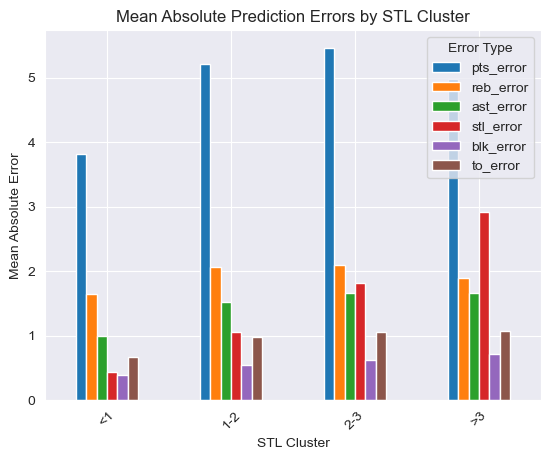

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

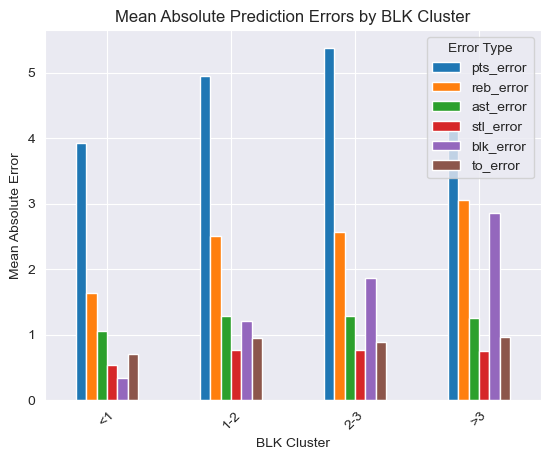

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

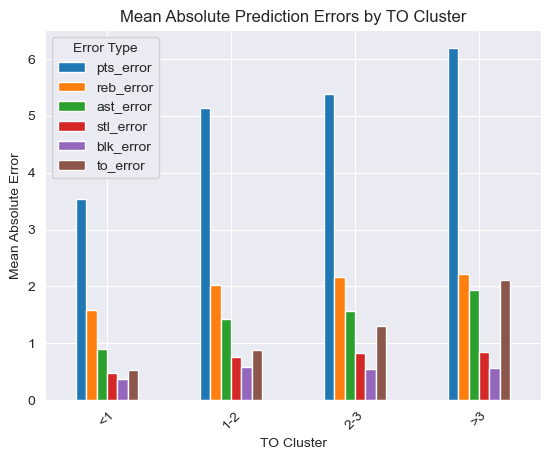

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

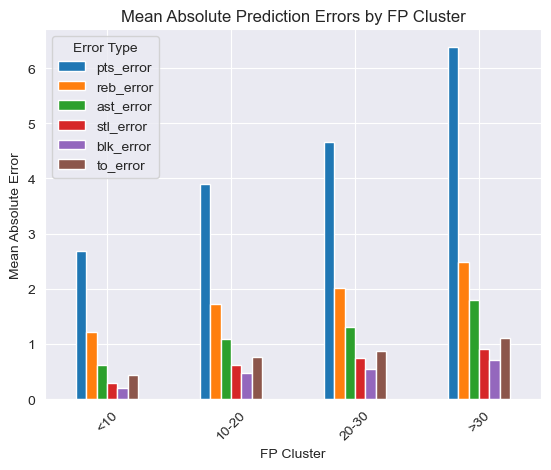

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

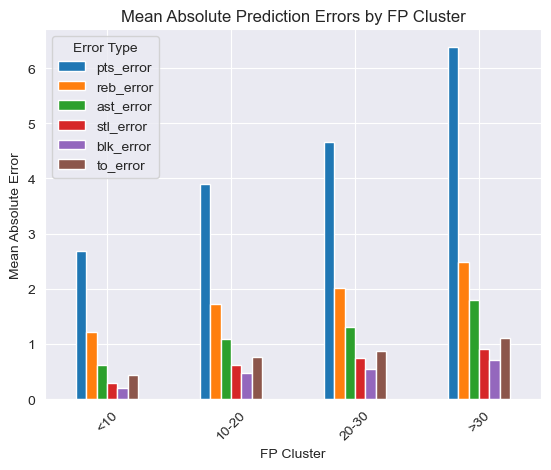

C:\Users\User\AppData\Local\Temp\ipykernel_8552\3414182023.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_errors = df.groupby(cluster).mean()[[


<Figure size 1400x800 with 0 Axes>

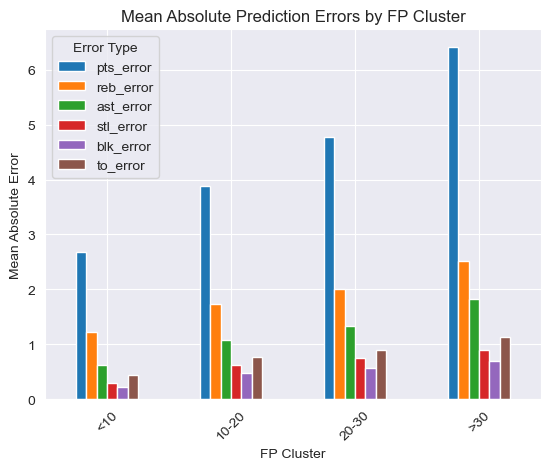

In [24]:
clusters = ['reb_cluster',
'ast_cluster',
'stl_cluster',
'blk_cluster',
'to_cluster',
'fp_fanduel_cluster',
'fp_yahoo_cluster',
'fp_draftkings_cluster',]

for cluster in clusters:
    cluster_name = cluster.split('_')[0].upper()
    cluster_errors = df.groupby(cluster).mean()[[
    'pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error',
    'fp_fanduel_error', 'fp_yahoo_error', 'fp_draftkings_error',
    'pts_pct_error', 'reb_pct_error', 'ast_pct_error', 'stl_pct_error', 'blk_pct_error', 'to_pct_error',
    'fp_fanduel_pct_error', 'fp_yahoo_pct_error', 'fp_draftkings_pct_error'
]]
    
    plt.figure(figsize=(14, 8))
    cluster_errors[['pts_error', 'reb_error', 'ast_error', 'stl_error', 'blk_error', 'to_error']].plot(kind='bar')
    plt.title(f'Mean Absolute Prediction Errors by {cluster_name} Cluster')
    plt.xlabel(f'{cluster_name} Cluster')
    plt.ylabel('Mean Absolute Error')
    plt.xticks(rotation=45)
    plt.legend(title='Error Type')
    plt.show()



## Group by cluster